### Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
# import textnets as tn
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# For NLP(text cleaning)
import nltk
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# For NLP(feature extraction)
from sklearn.feature_extraction.text import TfidfVectorizer

# For dimension reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

# For clustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN, AgglomerativeClustering

# For file handeling operations
from sklearn.metrics import silhouette_score
import os
from glob import glob
from tqdm import tqdm

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Imporrt Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Mypertamina/hasil2_prep_mypertamina_20232.csv')
df.head(5)

hasil
0  daftar selalu tolak alas foto stnk sesuai pada...
1  khusus wilayah jateng nomor ulang kendara moto...
2  aplikasi bagus kontrol analisa pakai bbm mungk...
3  buat apa aplikasi kalau spbu terima bayar lalu...
4  sangat kecewa mau beli bbm pakai aplikasi baru...

In [ ]:
len(df)

5222

In [ ]:
# Menghapus baris duplikat berdasarkan kolom 'A'
df2 = df.drop_duplicates()
df3 = df2.dropna()



In [ ]:
len(df3)

4967

In [ ]:
df3

hasil
0     daftar selalu tolak alas foto stnk sesuai pada...
1     khusus wilayah jateng nomor ulang kendara moto...
2     aplikasi bagus kontrol analisa pakai bbm mungk...
3     buat apa aplikasi kalau spbu terima bayar lalu...
4     sangat kecewa mau beli bbm pakai aplikasi baru...
...                                                 ...
5211                                     aplikasi mabok
5213                                             jumlah
5216                                        sopir mobil
5217                     aplikasi bangsat anjing goblok
5220                                             lambat

[4967 rows x 1 columns]

In [ ]:
news_articles = []

for abs_filepath in tqdm(df['hasil'], colour='yellow'):
    try:
        # # Open the file
        # f = open(abs_filepath,"r")
        # # Read the contents of the file
        # news_article = f.read()
        # Append it in a list
        news_articles.append(str(abs_filepath))
    except:
        # f = open(abs_filepath,'rb')
        # # Read the contents of the file
        # news_article = f.read()
        # Append it in a list
        news_articles.append(str(abs_filepath))

100%|██████████| 5222/5222 [00:00<00:00, 737090.88it/s]


In [ ]:
len(news_articles)

5222

### Data Clean

In [ ]:
# Create a stemmer object which will be used to stem all the words to its root
ps = PorterStemmer()

# Empty list to store the clean text
clean_articles = []

for article in tqdm(news_articles, colour='yellow'):
    # Replace the end lines <\n>
    article = article.replace("\\n",'')

    # Remove all excepth the alphabets
    article = re.sub("[^a-zA-Z]",' ', article)

    # Lower all the aplhabets
    article = article.lower()

    # Split the article on spaces, returning a list of words
    words = article.split()

   # Remove stopwords
    clean_article = [ps.stem(word) for word in words if not word in stopwords.words("indonesian")]

    # Join clean words
    clean_article = " ".join(clean_article)

    # Append the tweet
    clean_articles.append(clean_article)


100%|██████████| 5222/5222 [00:21<00:00, 244.67it/s]


In [ ]:
len(clean_articles)

4967

### TF-IDF

In [ ]:
# Initialize a vectorizer object
tfidf = TfidfVectorizer()

# Fit transform the clean article to create vectors
article_vectors = tfidf.fit_transform(clean_articles)

In [ ]:
# Initialize a SVD object
svd = TruncatedSVD(2000)

# Transform the data
reduced_articles = svd.fit_transform(article_vectors)

In [ ]:
reduced_articles

array([[ 0.17356589,  0.00637928, -0.07980794, ...,  0.01122707,
        -0.00182195,  0.00253582],
       [ 0.20490508,  0.01589343,  0.06188468, ...,  0.00246516,
        -0.00566847, -0.00659455],
       [ 0.14518864, -0.10763617, -0.05416943, ...,  0.01079663,
         0.01320214, -0.00277394],
       ...,
       [ 0.02630255,  0.00828063, -0.02877951, ..., -0.00295198,
         0.00583708, -0.00094068],
       [ 0.08532115, -0.08784842,  0.06589181, ..., -0.00039372,
        -0.00156112,  0.0180738 ],
       [ 0.01940272, -0.00728355,  0.000561  , ..., -0.00326565,
        -0.00481435,  0.0002911 ]])

### Elbow and Silhoutte Score

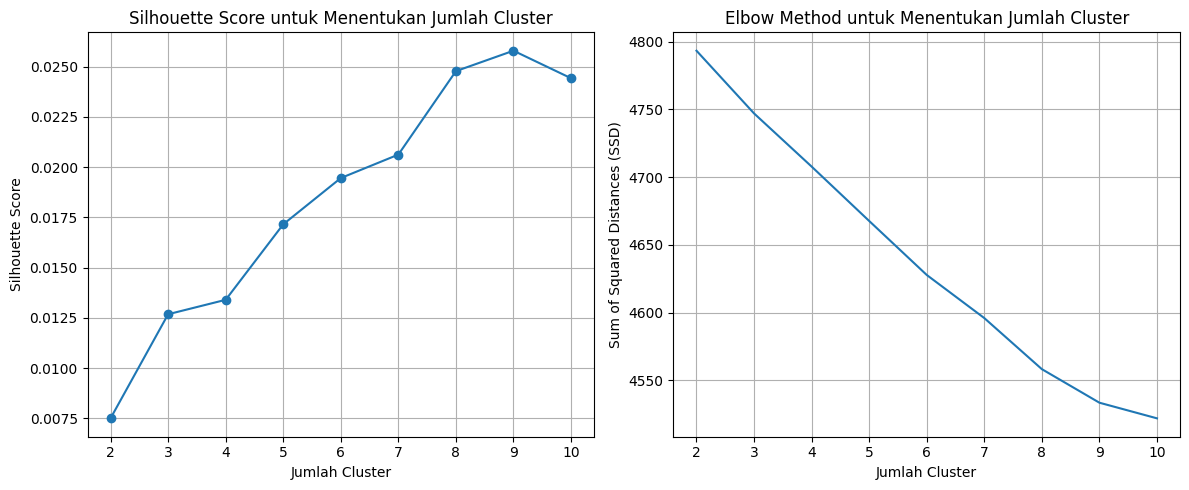

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 10
# List untuk menyimpan nilai Silhouette Score dan Sum of Squared Distances (SSD)
silhouette_scores = []
ssd = []

# Iterasi untuk mencoba berbagai jumlah cluster
for n_clusters in range(2, k + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=5000)
    labels = kmeans.fit_predict(reduced_articles)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(reduced_articles, labels)
    silhouette_scores.append(silhouette_avg)

    # Calculate Sum of Squared Distances (SSD)
    ssd.append(kmeans.inertia_)

# Plot visualisasi Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, k + 1), silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster')
plt.xticks(np.arange(2, k + 1))
plt.grid()

# Plot visualisasi Elbow Method
plt.subplot(1, 2, 2)
plt.plot(range(2, k + 1), ssd)
plt.xlabel('Jumlah Cluster')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xticks(np.arange(2, k + 1))
plt.grid()

plt.tight_layout()
# plt.savefig('/content/drive/MyDrive/dataset/Mypertamina/sh_elbow_mypertamina.png')
plt.show()


In [ ]:
# Menampilkan nilai Silhouette Score untuk tiap jumlah klaster
for num_clusters, score in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette Score for {num_clusters} clusters: {score}")

Silhouette Score for 2 clusters: 0.007495531388283753
Silhouette Score for 3 clusters: 0.012675717744589934
Silhouette Score for 4 clusters: 0.013394109055120234
Silhouette Score for 5 clusters: 0.01715071123576287
Silhouette Score for 6 clusters: 0.019453036239118662
Silhouette Score for 7 clusters: 0.020620284822653972
Silhouette Score for 8 clusters: 0.024773512789910204
Silhouette Score for 9 clusters: 0.025789801410309128
Silhouette Score for 10 clusters: 0.024420491545518532


### K-Means

In [ ]:
# Initialize the model
kmeans = KMeans(n_clusters=9)

# Fit on the data
kmeans.fit(reduced_articles)

# Get the labels
labels = kmeans.labels_

In [ ]:
# Create a dictionary
df_dict = {"comment":news_articles, 'labels_km':labels}

# Convert to dataframe
df = pd.DataFrame(df_dict)

# Print head
df.head()

comment  labels_km
0  daftar selalu tolak alas foto stnk sesuai pada...          5
1  khusus wilayah jateng nomor ulang kendara moto...          7
2  aplikasi bagus kontrol analisa pakai bbm mungk...          7
3  buat apa aplikasi kalau spbu terima bayar lalu...          7
4  sangat kecewa mau beli bbm pakai aplikasi baru...          5

### Visualization K-Means

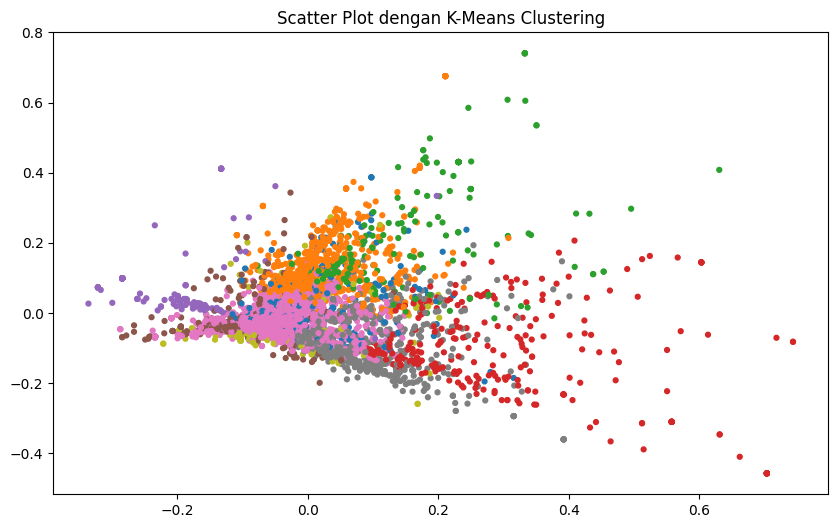

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors

kmeans_indices = kmeans.fit_predict(reduced_articles)

pca = PCA(n_components=2)

scatter_plot_points = pca.fit_transform(article_vectors.toarray())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
          '#7f7f7f', '#bcbd22', '#17becf', '#1abc9c', '#3498db', '#f39c12', '#e74c3c', '#95a5a6']

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Scatter Plot dengan K-Means Clustering')
ax.scatter(x_axis, y_axis, c=[colors[d]for d in kmeans_indices], s=12)
# plt.savefig('/content/drive/MyDrive/dataset/Serangan_Clustering/sebaran_cluster_request.png')

plt.show()

In [ ]:
# Initlalize the tnse object
tsne = TSNE(n_components=2)

# Transform the data
tsne_data = tsne.fit_transform(reduced_articles)

# Convert to Dataframe
tsne_df = pd.DataFrame(tsne_data, columns=['comp1','comp2'])

In [ ]:
tsne_df

comp1      comp2
0     36.202221  20.620918
1    -57.127060 -15.853923
2      1.242023   7.022668
3    -73.134506  27.857460
4     22.090378  25.744268
...         ...        ...
5451   9.298160   1.751856
5452 -19.072857 -44.269218
5453  -7.854731  16.244932
5454  24.834490  11.399171
5455  32.590828  23.518690

[5456 rows x 2 columns]

In [ ]:
def tsne_viz1(tsne_df,labels,label_col='',ax=False):
    if not ax:
        plt.figure(figsize=(15,9))
        sns.scatterplot(x=tsne_df['comp1'],y=tsne_df['comp2'],hue=labels,palette='tab10')
        # plt.savefig('/content/drive/MyDrive/dataset/Mypertamina/kmeans-vis.png')
        plt.show()
    else:
        ax.set_title(f"Visualising the clusters of {label_col} using TSNE")
        sns.scatterplot(x=tsne_df['comp1'],y=tsne_df['comp2'],hue=labels,palette='tab10',ax=ax)

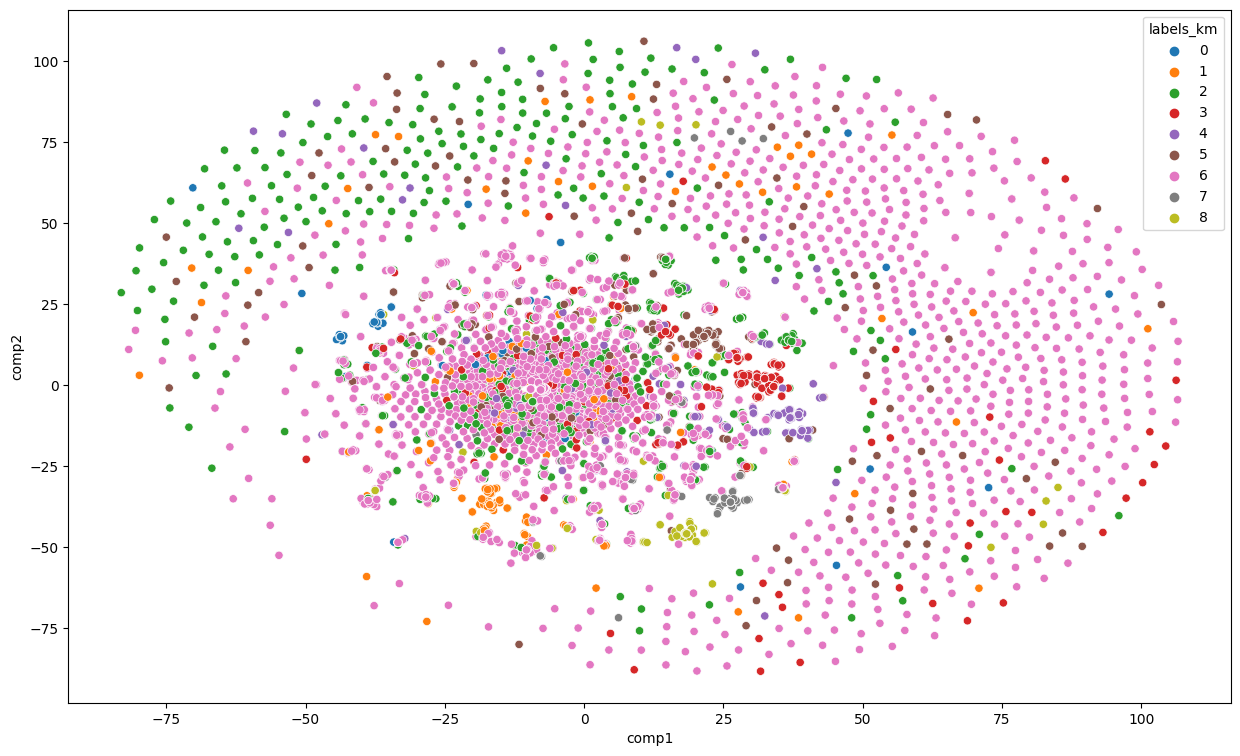

In [ ]:
tsne_viz1(tsne_df,df['labels_km'])

In [ ]:
ii_cluster =[]
k_cluster = 9

for i in range(k_cluster):
  ii_cluster.append("Cluster %d:" % i)

In [ ]:
Nilai = df['labels_km'].value_counts()
Nilai

7    3532
5     531
2     268
8     246
0     222
3     126
6     108
4      99
1      90
Name: labels_km, dtype: int64

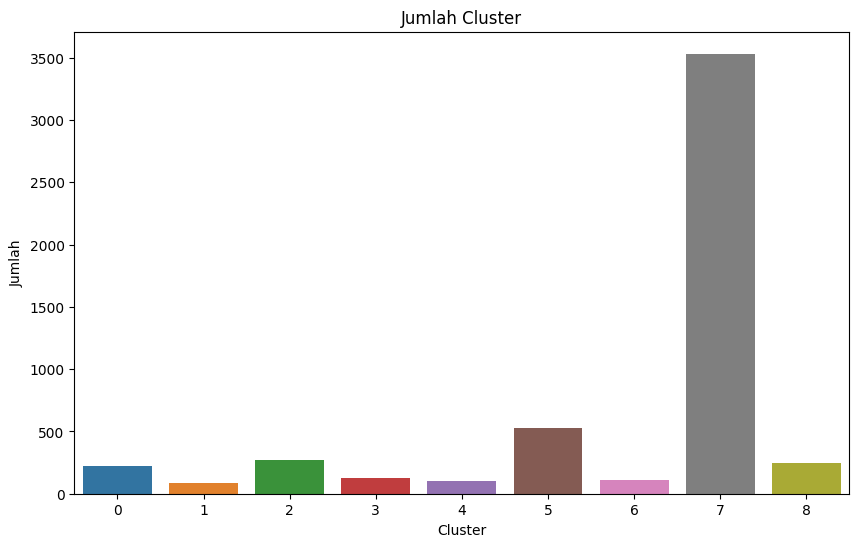

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=Nilai.index, y=Nilai.values)
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.title('Jumlah Cluster')
# plt.savefig('/content/drive/MyDrive/dataset/Mypertamina/.png')
plt.show()

In [ ]:
unique_clusters = df['labels_km'].unique()

# Memisahkan hasil cluster dan menyimpannya dalam file CSV
for cluster_value in unique_clusters:
    cluster_df = df[df['labels_km'] == cluster_value]
    cluster_name = f'cluster_{cluster_value}'
    csv_filename = f'A5000-{cluster_name}.csv'
    cluster_df.to_csv(csv_filename, index=False)

In [ ]:
import pandas as pd
from collections import Counter

# Lakukan perulangan untuk membaca 10 file CSV
for i in range(0, 10):
    nama_file = f"A5000-cluster_{i}.csv"  # Ganti dengan nama file CSV Anda

    try:
        # Baca file CSV
        df = pd.read_csv(nama_file)

        # Menggabungkan teks dari setiap file CSV
        all_text = ' '.join(df['comment'].dropna().astype(str).tolist())  # Ganti 'kolom_teks' dengan nama kolom teks

        # Membagi kata-kata
        words = all_text.split()

        # Menghitung kemunculan setiap kata
        word_counts = Counter(words)

        # Menampilkan kata yang paling banyak muncul (misalnya, 10 kata teratas)
        top_words = word_counts.most_common(15)  # Ganti 10 dengan jumlah kata teratas yang ingin ditampilkan

        print(f"\nKata-kata yang paling banyak muncul dalam {nama_file}:")
        for word, count in top_words:
            print(f"Kata: {word}, Jumlah Kemunculan: {count}")

    except FileNotFoundError:
        print(f"File {nama_file} tidak ditemukan.")

    # Lakukan proses untuk file selanjutnya



Kata-kata yang paling banyak muncul dalam A5000-cluster_0.csv:
Kata: ribet, Jumlah Kemunculan: 255
Kata: aplikasi, Jumlah Kemunculan: 85
Kata: aja, Jumlah Kemunculan: 53
Kata: bikin, Jumlah Kemunculan: 49
Kata: daftar, Jumlah Kemunculan: 43
Kata: mau, Jumlah Kemunculan: 29
Kata: buat, Jumlah Kemunculan: 21
Kata: sulit, Jumlah Kemunculan: 20
Kata: gak, Jumlah Kemunculan: 20
Kata: ga, Jumlah Kemunculan: 20
Kata: makin, Jumlah Kemunculan: 20
Kata: terlalu, Jumlah Kemunculan: 19
Kata: banget, Jumlah Kemunculan: 18
Kata: beli, Jumlah Kemunculan: 18
Kata: tambah, Jumlah Kemunculan: 17

Kata-kata yang paling banyak muncul dalam A5000-cluster_1.csv:
Kata: mantap, Jumlah Kemunculan: 88
Kata: pertamina, Jumlah Kemunculan: 10
Kata: aplikasi, Jumlah Kemunculan: 9
Kata: sangat, Jumlah Kemunculan: 9
Kata: my, Jumlah Kemunculan: 6
Kata: bantu, Jumlah Kemunculan: 5
Kata: oke, Jumlah Kemunculan: 4
Kata: layan, Jumlah Kemunculan: 4
Kata: mypertamina, Jumlah Kemunculan: 4
Kata: banget, Jumlah Kemunculan

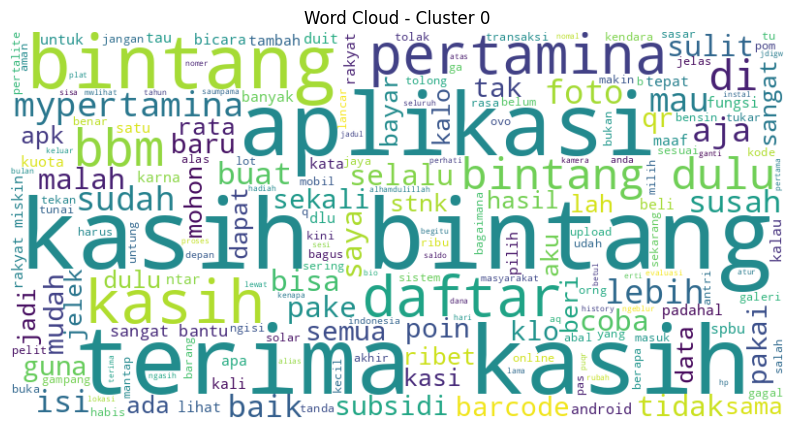

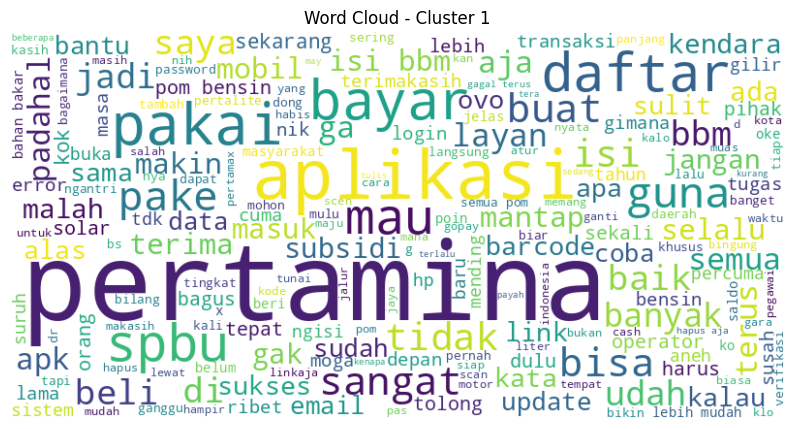

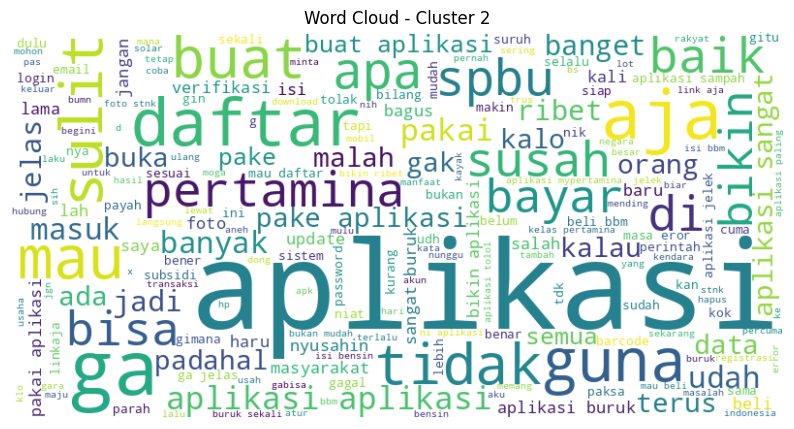

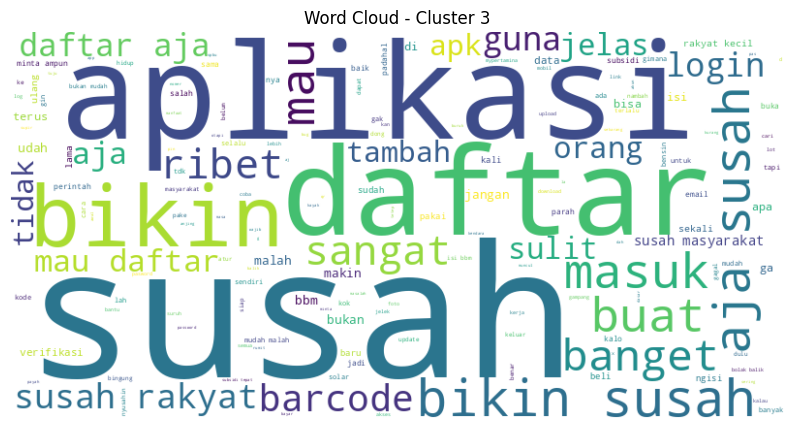

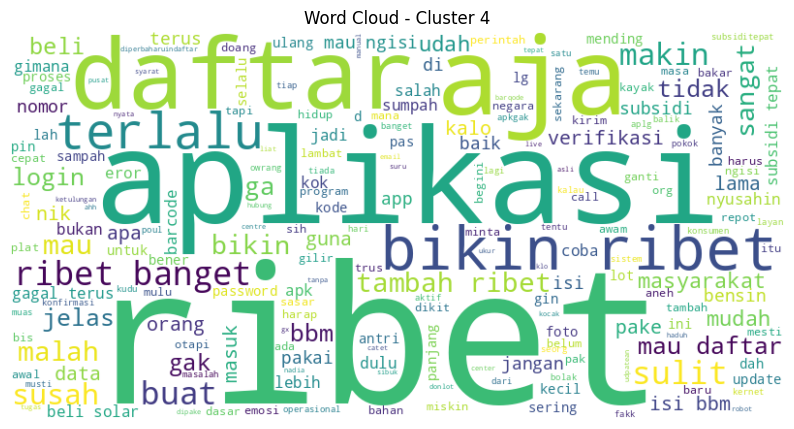

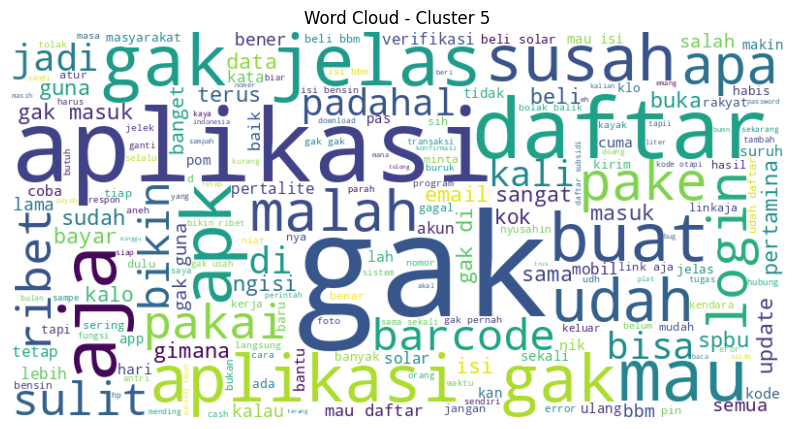

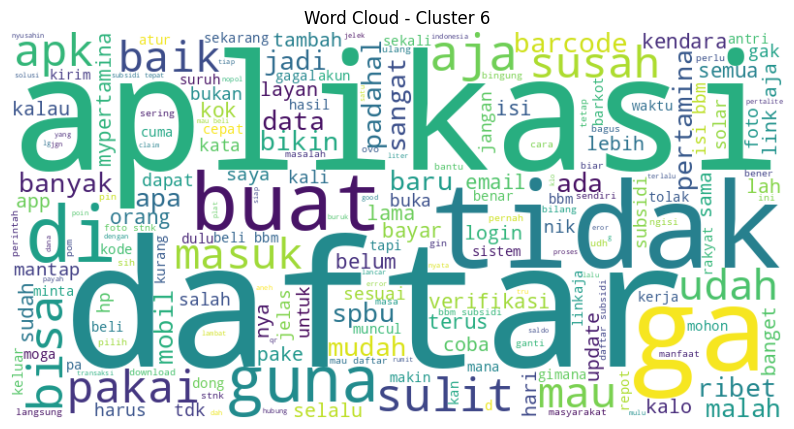

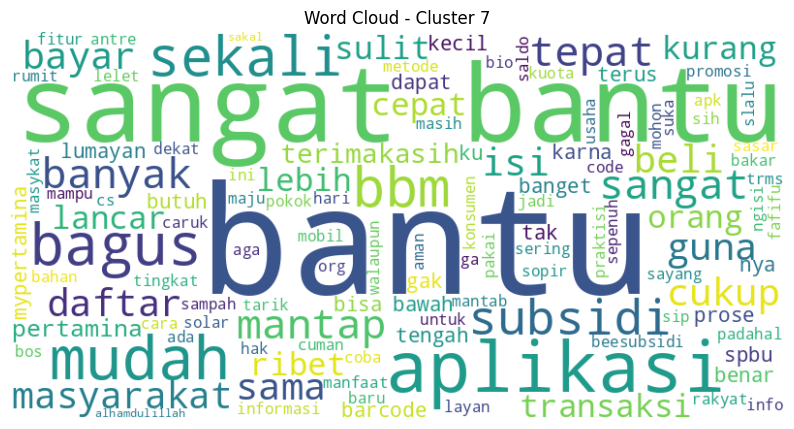

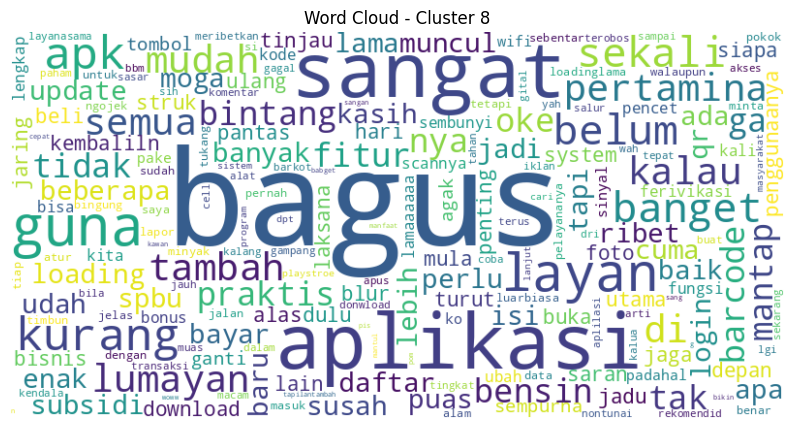

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Lakukan perulangan untuk membaca 10 file CSV
for i in range(0, 9):
    nama_file = f"5000-cluster_{i}.csv"  # Membuat nama file sesuai dengan iterasi
    try:
        # Membaca file CSV
        df = pd.read_csv(nama_file)

        # Misalkan kolom teks yang ingin digunakan untuk word cloud bernama 'teks'
        # Ganti 'teks' dengan nama kolom yang sesuai di file CSV Anda
        data_teks = ' '.join(df['comment'].dropna().astype(str).tolist())

        # Membuat word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data_teks)

        # Tampilkan word cloud
        plt.figure(figsize=(10, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud - Cluster {i}")
        plt.axis('off')
        plt.savefig(f"WordCloud-Cluster{i}.png")
        plt.show()

    except FileNotFoundError:
        print(f"File {nama_file} tidak ditemukan.")

    # Lakukan proses untuk file selanjutnya
    # Di sini Anda dapat melakukan operasi yang diinginkan terkait dengan setiap file CSV
